In [1]:
import sys
sys.path.append("../dev_scripts/")
import exp_tools
import sklearn
from sklearn.preprocessing import StandardScaler
import numpy as np
from fri import bounds,plot_dendrogram_and_intervals
from fri import *
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

Generate problem data 

In [32]:
state = np.random.RandomState(123)
X,y = exp_tools.gen_quadrant_problem(random_state=state)


Plot of data colored using class assignment

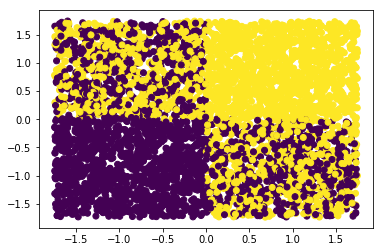

In [33]:
plt.scatter(X[:,0],X[:,1],c=y)

In [34]:
pd.DataFrame(X).corr()

,0,1,2,3
0,1.000000,-0.007414,0.018837,-0.007725
1,-0.007414,1.000000,-0.001506,-0.005419
2,0.018837,-0.001506,1.000000,-0.000587
3,-0.007725,-0.005419,-0.000587,1.000000


Feature 1 and 2 are not correlated, feature 3 and 4 are random

Running fri allowing 15% deviation of optimal results weight L1 and high allowed slack

In [35]:
f = FRIClassification(optimum_deviation=0.15,C=0.000526)

In [36]:
f.fit(X,y)

Score of model is as expected.
We always have 25% misclassifications.

In [37]:
f.score(X,y)

0.74697829165438456

In [38]:
f.optim_loss_

3547.9851427464191

In [39]:
f.optim_L1_

0.77922291018659162

Feature 1 and 2 can be completely replaced by each other

In [40]:
f.interval_

array([[ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  0.12910328],
       [ 0.        ,  0.12620992]])

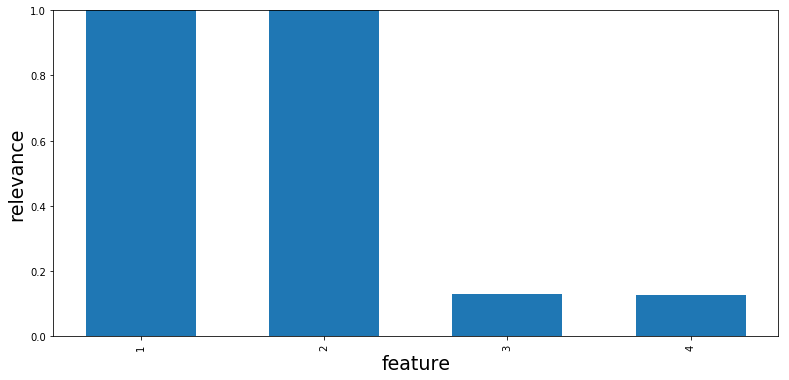

In [41]:
p = plotIntervals(f.interval_)

## Groups?

In [42]:
clust, link, feat_points,dist_mat = f.community_detection2(X,y,mode="both")

In [43]:
clust

array([1, 1, 2, 2], dtype=int32)

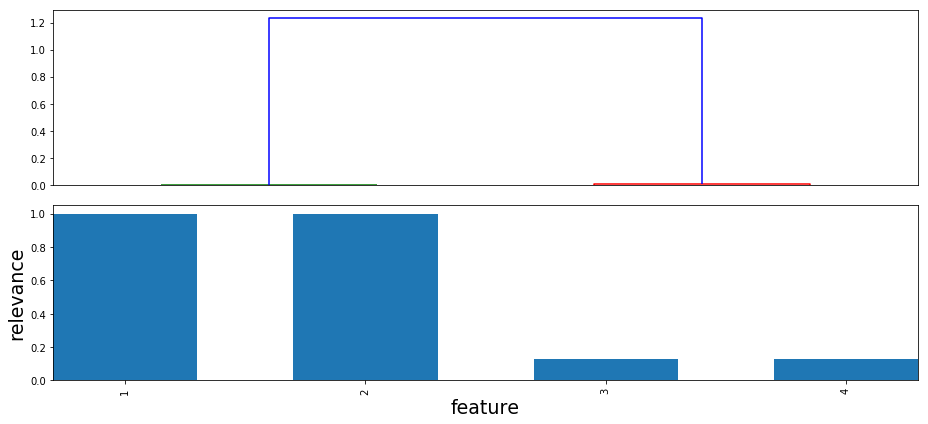

In [44]:
p = plot_dendrogram_and_intervals(f.interval_,link)

/home/lpfannschmidt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  if sys.path[0] == '':


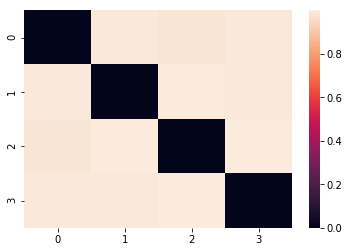

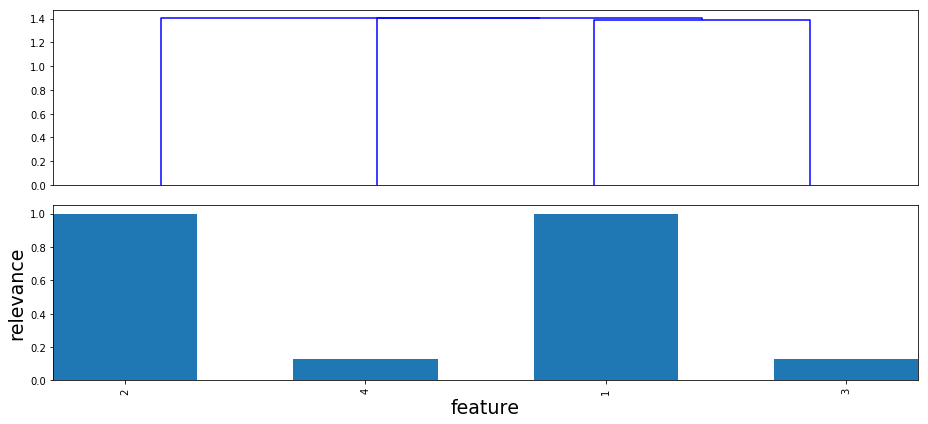

In [48]:
import pandas as pd
import seaborn as sns
corr_pd = pd.DataFrame(X).corr()

corr_pd = 1-corr_pd.abs()
corr_pd = corr_pd.values

sns.heatmap(corr_pd)

from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage
z = linkage(corr_pd,method="single")
threshold = 0.55*np.max(z[:, 2])
p = plot_dendrogram_and_intervals(f.interval_,z)

# For comparison a normal run of fri

In [15]:
f = FRIClassification(debug=True,C=0.001)
f.fit(X,y)

loss 2976.92442918
L1 1.03763881734
offset -0.0013462985152097088
C 0.001
score 0.759785347434
coef:
[[  4.43706795e-01]
 [  5.83658371e-01]
 [  6.08241591e-16]
 [  1.49576441e-15]]


In [16]:
f.score(X,y)

0.75978534743368586

In [17]:
f.optim_L1_

1.0376388173382025

In [18]:
f.optim_loss_

2976.9244291774571

In [19]:
f.tuned_C_

0.001

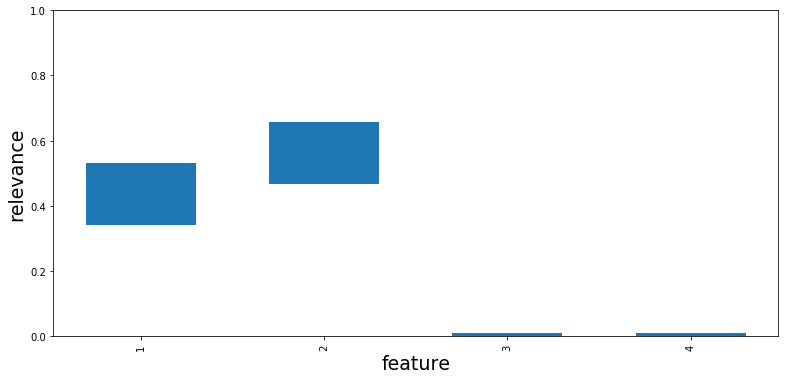

In [20]:
p = plotIntervals(f.interval_)